<a href="https://colab.research.google.com/github/sindhuparusha225/Gen-AI-2025/blob/main/2303A52207_Week_07_Assignment_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. (1 ponto) Design a multilayer ANN architecture according to the requirements shown below.
Train, test, save (.h5) and deploy the model to diagnose diabatic disease using the Keras deep
learning library

2. (1 ponto) Calculate training and testing accuracy, build confusion matrix, also calculate recall,
precision and F1-score.

3. (1 ponto) Build the application by loading the saved ANN model.

        Tabela 1: ANN Architecture
        Layer              Neurons   Activation Function
        Hidden Layer - 1     12        swish
        Hidden Layer - 2     25        swish
        Hidden Layer - 3     15        swish

        Tabela 2: Training Parameters
        epochs   batch size   error metric   Optimizer
        300        16          accuracy       adagrad

Dataset: https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset?resource=download

• Expected learning Outcomes from this assignment related to python

– Students are able to build ANN model with python deep learning libraries

– Students are able to deploy trained ANN model

– Students are able to measure training and testing performance of trained mode

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Training set: (614, 8), Testing set: (154, 8)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4094 - loss: 0.7188 - val_accuracy: 0.4740 - val_loss: 0.7229
Epoch 2/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4493 - loss: 0.7158 - val_accuracy: 0.4870 - val_loss: 0.7181
Epoch 3/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4624 - loss: 0.7112 - val_accuracy: 0.5195 - val_loss: 0.7138
Epoch 4/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5349 - loss: 0.6974 - val_accuracy: 0.5390 - val_loss: 0.7099
Epoch 5/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5584 - loss: 0.6981 - val_accuracy: 0.5519 - val_loss: 0.7064
Epoch 6/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5446 - loss: 0.7008 - val_accuracy: 0.5649 - val_loss: 0.7031
Epoch 7/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5679 - loss: 0.6944 - val_accuracy: 0.5779 - val_loss: 0.6999
Epoch 8/300
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6095 - loss: 0.6914 - val_accuracy: 0.5779 - 

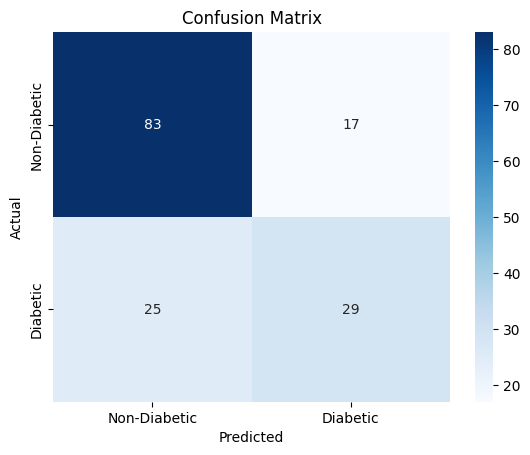

              precision    recall  f1-score   support

           0       0.77      0.83      0.80       100
           1       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
Model Prediction: Non-Diabetic (Probability: 0.4616)


In [ ]:
# Diabetes Diagnosis using Artificial Neural Networks (ANN)

## Importing Libraries
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

## Loading and Displaying Data
# Load the dataset
file_path = "/content/diabetes.csv"  # Ensure the file is in the same directory
df = pd.read_csv(file_path)

# Display first few rows
print(df.head())

## Preprocessing Data
# Separate features and target variable
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Check dataset shapes
print(f"Training set: {X_train.shape}, Testing set: {X_test.shape}")

## Building the ANN Model
# Define the ANN model
model = Sequential([
    Dense(12, activation='swish', input_shape=(8,)),  # Hidden Layer 1
    Dense(25, activation='swish'),                    # Hidden Layer 2
    Dense(15, activation='swish'),                    # Hidden Layer 3
    Dense(1, activation='sigmoid')                    # Output Layer (binary classification)
])

# Compile the model with Adagrad optimizer and accuracy metric
model.compile(optimizer='adagrad', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=300, batch_size=16, validation_data=(X_test, y_test), verbose=1)

# Save the trained model in the new Keras format
model.save("diabetes_model.keras")  # Updated format

## Evaluating Model Performance
# Evaluate model performance
train_loss, train_acc = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Precision, Recall, F1-score
print(classification_report(y_test, y_pred))

## Deploying the Model
# Load the saved model in the new format
loaded_model = keras.models.load_model("diabetes_model.keras")  # ✅ Corrected

# Test with a new sample (random test case from dataset)
sample_input = X_test[0].reshape(1, -1)
prediction = loaded_model.predict(sample_input)[0][0]
predicted_class = "Diabetic" if prediction > 0.5 else "Non-Diabetic"

print(f"Model Prediction: {predicted_class} (Probability: {prediction:.4f})")
